### Problema 2: Una aseguradora tiene datos de 120 clientes con su edad y el costo mensual de su póliza. Requieren modelar cómo aumenta el costo con la edad para ajustar sus tarifas.

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

#### Cargar los datos demográficos y de costos

In [15]:
datos = pd.read_csv("EdadSeguros.csv")
print(datos.head())
print(datos.describe())
print(datos.info())

   Edad   Costo
0     18     22
1     22     24
2     23     55
3     25     27
4     27     85
          Edad       Costo
count  80.00000  80.000000
mean   53.75000  52.162500
std    15.38987  24.120186
min    18.00000   5.000000
25%    42.75000  35.000000
50%    56.00000  55.000000
75%    66.00000  65.750000
max    79.00000  96.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Edad    80 non-null     int64
 1   Costo   80 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB
None


#### Verificar la relación lineal mediante un gráfico inicial

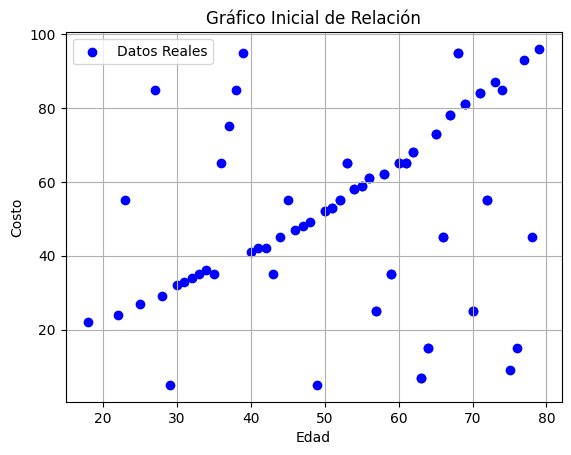

In [16]:
X = datos[["Edad "]].values  
y = datos["Costo"].values 
plt.scatter(X, y, color="blue", label="Datos Reales")
plt.title("Gráfico Inicial de Relación")
plt.xlabel("Edad")
plt.ylabel("Costo")
plt.grid()
plt.legend()
plt.show()

#### Entrenar el modelo de regresión y extraer sus parámetros

In [17]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y, train_size=0.2,random_state=42)
md=LinearRegression()
md.fit(X_train1,y_train1)

LinearRegression()

#### Calcular intervalos de confianza para las predicciones

In [18]:
y_pred=md.predict(X_test1)
residuals = y_test1 - y_pred
dof = len(X_test1) - 2 
mse = mean_squared_error(y_test1, y_pred)
se = np.sqrt(mse * (1/len(X_test1) + (X_test1 - X_test1.mean())**2 / np.sum((X_test1 - X_test1.mean())**2)))
t_value = stats.t.ppf(0.975, dof)
limiteInferior = y_pred - t_value * se.flatten()
limiteSuperior = y_pred + t_value * se.flatten()

#### Crear una visualización que muestre: Puntos con los datos reales y línea de regresión

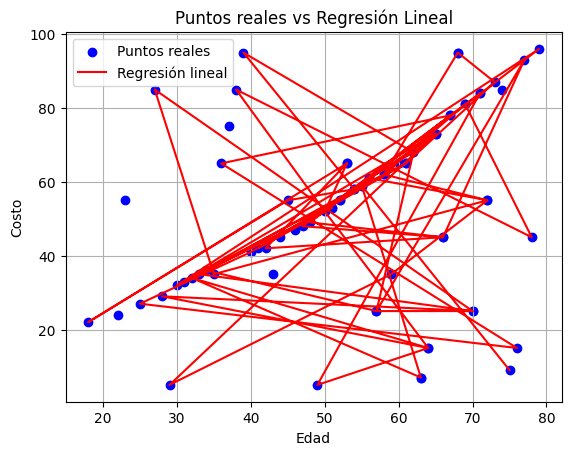

In [19]:
plt.scatter(X,y, label="Puntos reales", color= "blue")
plt.plot(X_test1,y_test1, label="Regresión lineal", color= "red")
plt.title("Puntos reales vs Regresión Lineal")
plt.xlabel("Edad")
plt.ylabel("Costo")
plt.grid()
plt.legend()
plt.show()

#### Generar una tabla con predicciones para edades clave (30, 40, 50, 60 años)

In [20]:
edades_clave = pd.DataFrame({"Edad": [30, 40, 50, 60]})
prediccion = md.predict(edades_clave)
tabla = pd.DataFrame({
    "Edad": edades_clave["Edad"],
    "Costo Predicho": prediccion
})

print("\nPredicciones para edades clave:")
print(tabla)


Predicciones para edades clave:
   Edad  Costo Predicho
0    30       41.554364
1    40       47.367375
2    50       53.180386
3    60       58.993397


c:\Users\sebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
